<a href="https://colab.research.google.com/github/Matteriegray/Linearr/blob/main/lin_sc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


class linearReg:

    def __init__(self , lr = 0.001, n_itr = 100):
        self.lr = lr
        self.n_itr = n_itr
        self.weights = None
        self.bias = None

    def fit(self , X , y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_itr):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T , (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias + self.lr * db


    def pred(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        return y_pred


In [13]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



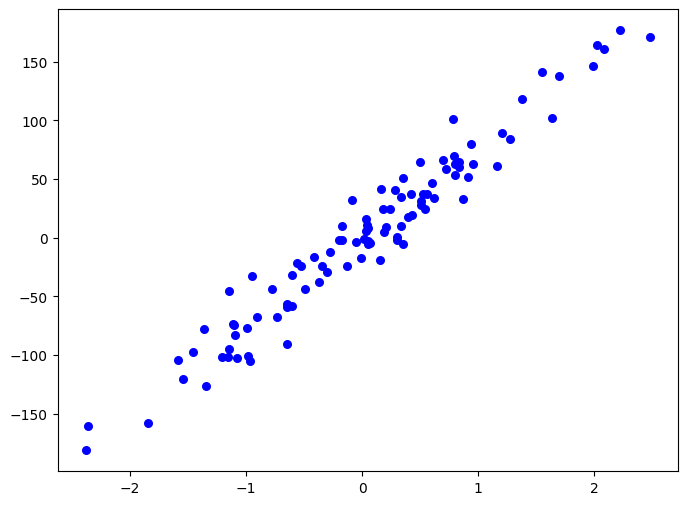

In [14]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [15]:
reg = linearReg(lr = 0.035)
reg.fit(X_train,y_train)
predictions = reg.pred(X_test)

In [16]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

def accuracy(y_test, predictions):
    return np.mean((y_test-predictions)/len(y_test))

acc = accuracy(y_test, predictions)
print(acc)

529.3125240453729
0.7502077287273645


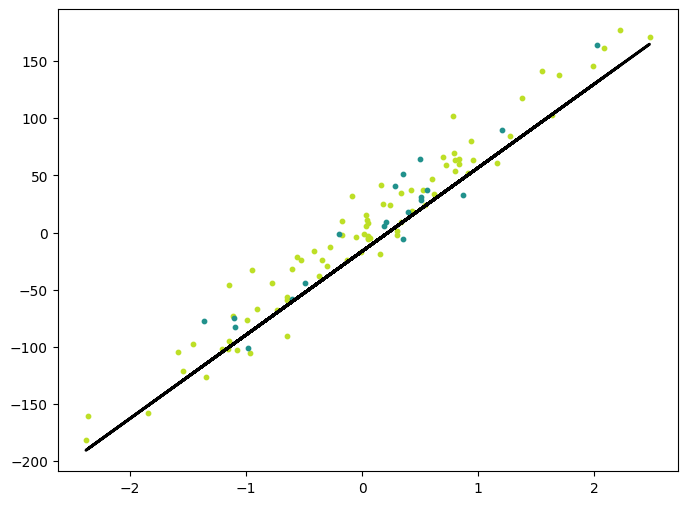

In [17]:
y_pred_line = reg.pred(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()